# Infosys Stock (High) Price Forcasting using Facebook Prophet

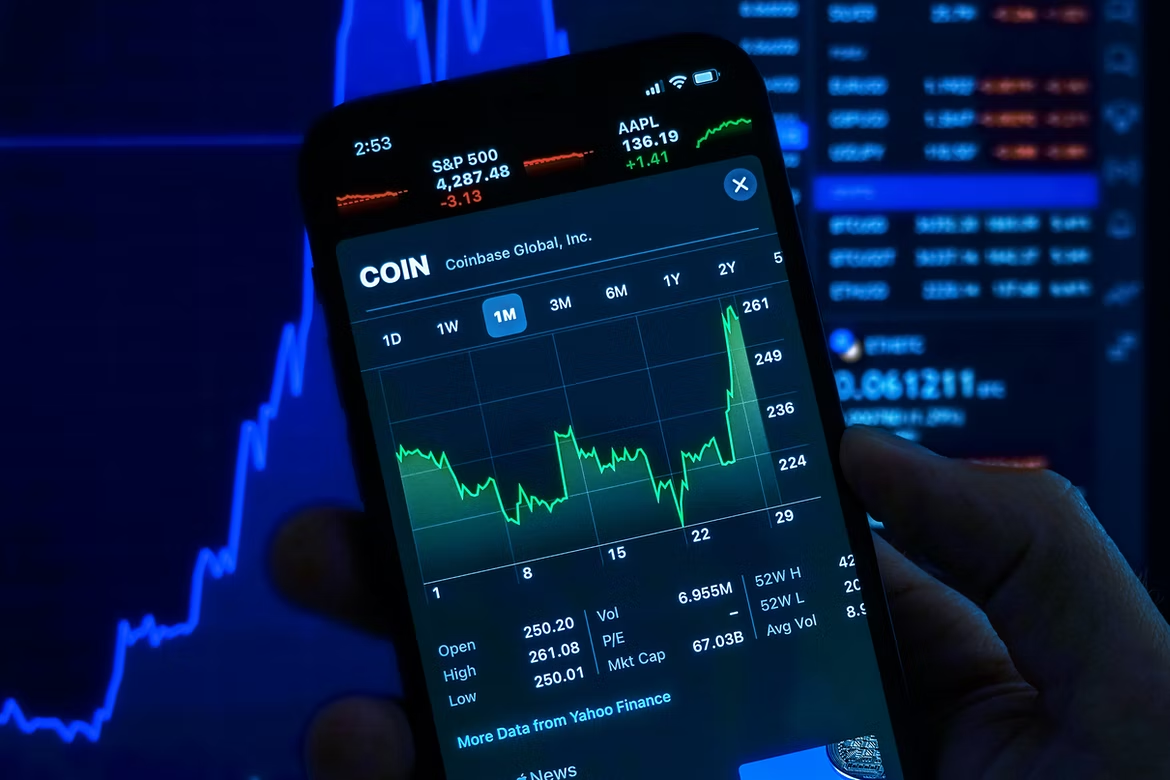

## Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading Finance Data

In [2]:
raw_data = yfinance.download (tickers = "INFY.NS", start = "2016-01-02", 
                              end = "2022-08-23", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  1 of 1 completed


In [3]:
raw_data.head()

Open        High         Low       Close   Volume
Date                                                               
2016-01-04  465.474172  466.532116  455.360269  456.566315  3975362
2016-01-05  459.359248  459.359248  449.520370  454.513885  4949786
2016-01-06  454.767733  454.767733  448.102687  452.524872  5588328
2016-01-07  448.589349  451.911283  443.447732  444.674957  5294088
2016-01-08  449.202981  451.699739  446.663916  449.964722  3156716

### Data Preprocessing

In [4]:
df = pd.DataFrame()
df['Date'] = raw_data.index
df['High'] = raw_data['High'].values
df.rename(columns={'Date':'ds','High':'y'},inplace=True)

### Data Exploration

Text(0.5, 1.0, 'Price (High) of Infosys Stock')

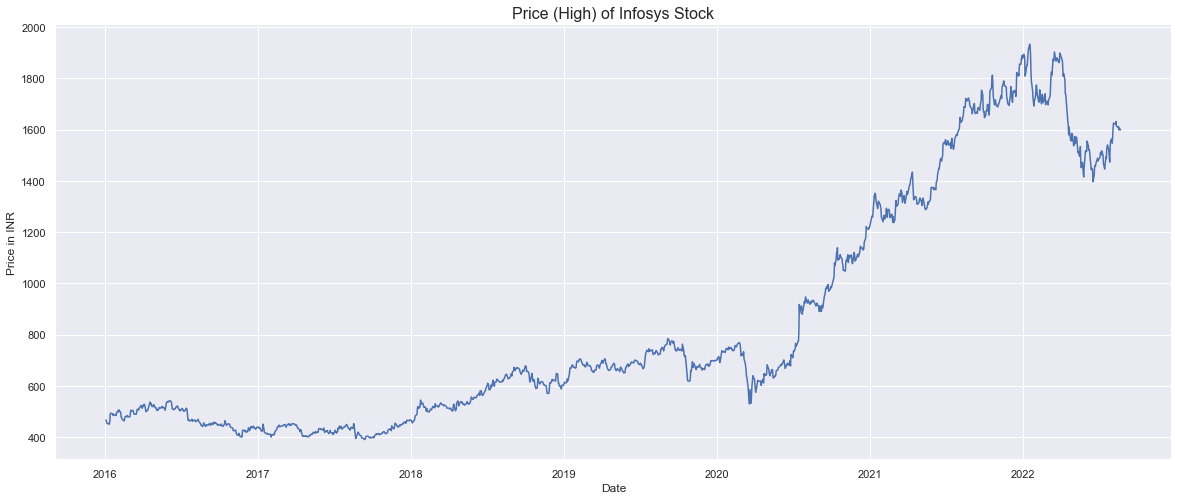

In [5]:
plt.figure(figsize=(20,8))
plt.plot(df.ds,df.y)
plt.ylabel('Price in INR')
plt.xlabel('Date')
plt.title('Price (High) of Infosys Stock',fontsize=(16))

### Fit Model

In [6]:
m = Prophet()
m.fit(df);

14:16:01 - cmdstanpy - INFO - Chain [1] start processing
14:16:01 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=60)
forcast = m.predict(future)

### Seasonality

In [9]:
plot_components_plotly(m, forcast)

### Forcast For Next 30 Days

In [11]:
plot_plotly(m, forcast)